Files available in /kaggle/input/shopping-behaviour-dataset:
/kaggle/input/shopping-behaviour-dataset/shopping_behavior_updated.csv


/tmp/ipython-input-1091068333.py:30: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'shopping-behaviour-dataset' dataset.
Aperçu du dataset:
   Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Sp

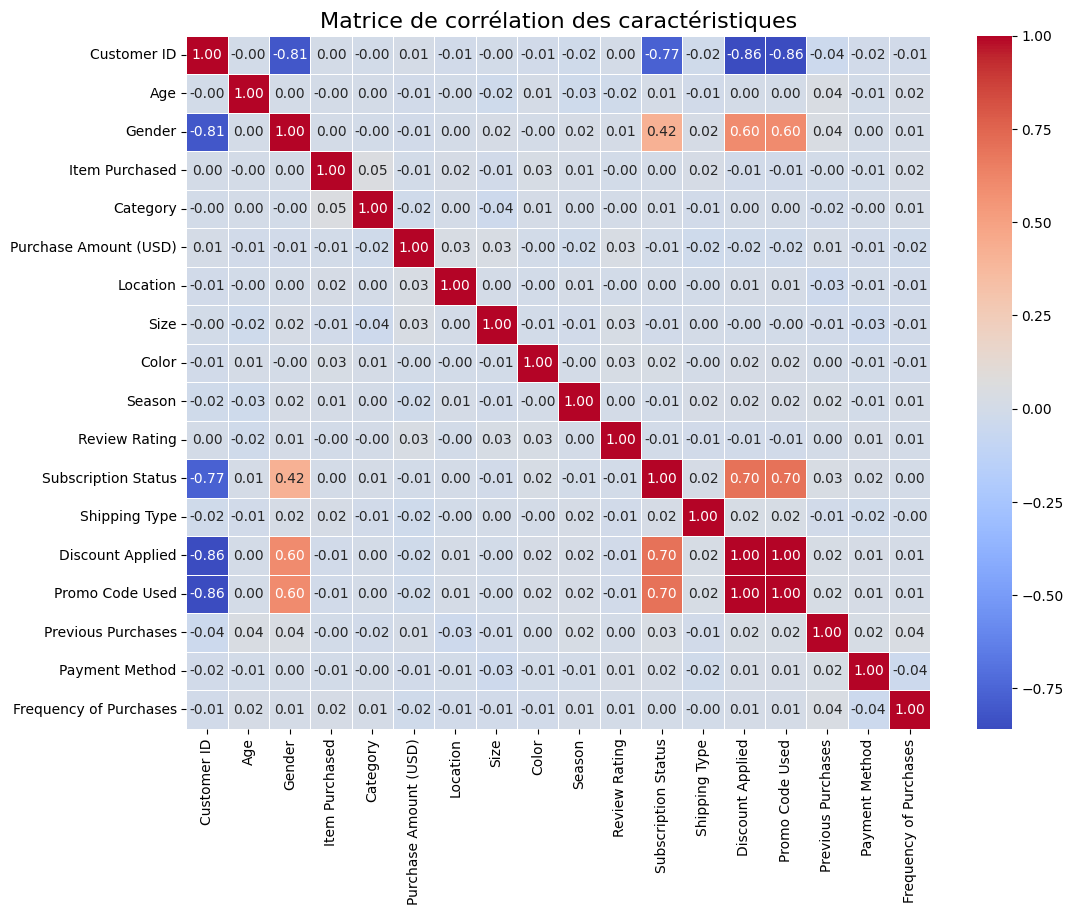


Rapport de classification :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       228
           1       1.00      1.00      1.00       552

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780


Matrice de confusion brute :
[[228   0]
 [  0 552]]


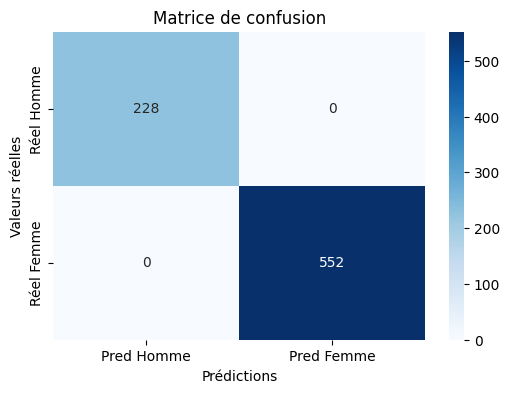


Importance des variables :
                   Feature  Importance
0              Customer ID    0.717441
12        Discount Applied    0.102096
13         Promo Code Used    0.095720
10     Subscription Status    0.032130
14      Previous Purchases    0.006492
1                      Age    0.006102
4    Purchase Amount (USD)    0.006026
5                 Location    0.005820
7                    Color    0.004953
9            Review Rating    0.004701
2           Item Purchased    0.004226
16  Frequency of Purchases    0.003350
11           Shipping Type    0.002938
15          Payment Method    0.002463
6                     Size    0.002245
8                   Season    0.001715
3                 Category    0.001582


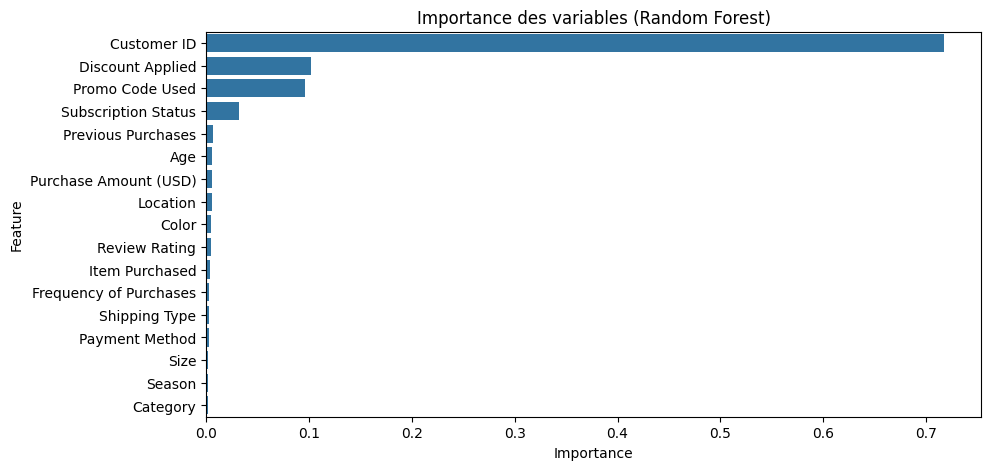

In [10]:
# ======================================================
# 1️⃣ Importation des bibliothèques
# ======================================================
import kagglehub
from kagglehub import KaggleDatasetAdapter

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import os

# ======================================================
# 2️⃣ Chargement du dataset via KaggleHub
# ======================================================
dataset_directory = "/kaggle/input/shopping-behaviour-dataset"
print(f"Files available in {dataset_directory}:")
for root, dirs, files in os.walk(dataset_directory):
    for file in files:
        print(os.path.join(root, file))

# IMPORTANT : mettre le nom exact du fichier CSV
file_path = "shopping_behavior_updated.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "grandmaster07/shopping-behaviour-dataset",
    file_path,
)

print("Aperçu du dataset:")
print(df.head())

# ======================================================
# 3️⃣ Vérification et Nettoyage des données
# ======================================================
print("\nValeurs manquantes :")
print(df.isnull().sum())

# Remplissage NA
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].median())

df = df.drop_duplicates()

print("\nDataset après nettoyage :")
print(df.info())

# ======================================================
# 4️⃣ Statistiques descriptives
# ======================================================
print("\nStatistiques numériques :")
print(df.describe())

print("\nStatistiques catégorielles :")
print(df.describe(include="object"))

# ======================================================
# 5️⃣ Encodage des variables catégorielles
# ======================================================
label = LabelEncoder()

for col in df.select_dtypes(include="object"):
    df[col] = label.fit_transform(df[col])

# ======================================================
# 6️⃣ Matrice de corrélation
# ======================================================
plt.figure(figsize=(12, 9)) # Slightly increased figure size for better visibility
sns.heatmap(
    df.corr(),
    annot=True,     # Show the correlation values on the heatmap
    fmt=".2f",      # Format annotations to two decimal places
    cmap="coolwarm", # Colormap to visualize the correlation strength
    linewidths=.5   # Add lines between cells for better separation
)
plt.title("Matrice de corrélation des caractéristiques", fontsize=16) # More descriptive title
plt.show()


# ======================================================
# 7️⃣ Définition des variables & choix de la cible
# ======================================================
X = df.drop("Gender", axis=1)
y = df["Gender"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ======================================================
# 8️⃣ Modélisation avec Random Forest
# ======================================================
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ======================================================
# 9️⃣ Évaluation du modèle
# ======================================================
y_pred = model.predict(X_test)

print("\nRapport de classification :")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion brute :")
print(cm)

# 🔵 Matrice de confusion en graphique
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Pred Homme", "Pred Femme"],
            yticklabels=["Réel Homme", "Réel Femme"])
plt.title("Matrice de confusion")
plt.xlabel("Prédictions")
plt.ylabel("Valeurs réelles")
plt.show()

# ======================================================
# 🔟 Importance des variables + GRAPHE
# ======================================================
importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nImportance des variables :")
print(importances)

plt.figure(figsize=(10, 5))
sns.barplot(data=importances, x="Importance", y="Feature")
plt.title("Importance des variables (Random Forest)")
plt.show()
